# Comparing the power-law collision kernels with the fractional Laplacian. 

In [1]:
include("collisionkernels.jl")
using .CollisionKernels
using Printf
using Plots
Threads.nthreads()

10

In [2]:
# This function computes the kernel of the fractional Laplacian (-Δ)^s
function fractional_laplacian(θ::Real, s::Real, K::Integer=100)
    @assert 0. <= s <= 1.
    res = 0.
    for k in -K:K
        res += abs(θ - π*k)^(-1-2s)
    end
    res += ( abs(π*(K+0.5) - θ)^(-2s) + abs(π*(K+0.5) + θ)^(-2s) ) / (s*π)
    return res
end

# We also want to estimate the values of $c_K$ and $C_P$ for the fractional Laplacian
using QuadGK

Λlocal = 4

function compute_cK(ν::Real)
    return quadgk(t -> t^(-1-ν/2)*(1-exp(-2Λlocal *t)),0,Inf)[1]
end

function compute_cP(ν::Real)
    return quadgk(t -> t^(-1-ν/2)*(1-exp(-4*t)),0,Inf)[1]
end

function compute_Λb(ν::Real)
    return 2*compute_cK(ν) / compute_cP(ν)
end

compute_Λb (generic function with 1 method)

In [3]:
compute_Λb(0.01)

2.03853160216398

In [4]:
P = 100
qs = [1.5,1.51,1.55,1.6,5/3,1.7,1.75,2.] #,4.,10.,20,40.]
νs = map(p->νofq(p,dimension=2),qs)

8-element Vector{Float64}:
 2.0
 1.9607843137254901
 1.8181818181818181
 1.6666666666666665
 1.4999999999999998
 1.4285714285714286
 1.3333333333333333
 1.0

In [5]:
println("\\begin{tabular}{|r|r|r|r|r|r|}")
println("\\hline")
println("\$q\$ & \$2s\$ & \$\\gamma\$ & \$c_2/C_1\$ & lower bound for \$2\\sqrt{\\Lambda_b}\$ \\\\")
println("\\hline")

for m in 1:length(νs)
    ν = νs[m]
    qf = qs[m]

    cfq = Cq(qf,dimension=2)
    extra_term = 0.
    #if (ν>1)
    #    extra_term = symb(π/2,qf,dim=2) / cfq - fractional_laplacian(π/2,ν/2)
    #end
    
    min = 1.
    max = 1.
    for i in 2:P
        θ = (1+i)/(P+1) * π/2
        ratio = (fractional_laplacian(θ,ν/2)+extra_term) / symb(θ,qf,dim=2) * cfq
        if ratio<min
            min = ratio
        end
        if ratio>max
            max = ratio
        end
    end

    Λb = compute_Λb(ν)
    if (ν>1.) Λb = 2*compute_cK(ν) / compute_cP(ν) end
    @printf "%.2f & %.2f & %.2f & %.2f & %.2f \\\\\n" qf ν (qf-3)/(qf-1) min/max 2*sqrt(Λb*min/max)
end
println("\\hline")
println("\\end{tabular}")

\begin{tabular}{|r|r|r|r|r|r|}
\hline
$q$ & $2s$ & $\gamma$ & $c_2/C_1$ & lower bound for $2\sqrt{\Lambda_b}$ \\
\hline
1.50 & 2.00 & -3.00 & 0.42 & 2.60 \\
1.51 & 1.96 & -2.92 & 0.44 & 2.65 \\
1.55 & 1.82 & -2.64 & 0.52 & 2.80 \\
1.60 & 1.67 & -2.33 & 0.61 & 2.95 \\
1.67 & 1.50 & -2.00 & 0.72 & 3.10 \\
1.70 & 1.43 & -1.86 & 0.76 & 3.16 \\
1.75 & 1.33 & -1.67 & 0.82 & 3.23 \\
2.00 & 1.00 & -1.00 & 1.00 & 3.36 \\
\hline
\end{tabular}


0.7401741442533594


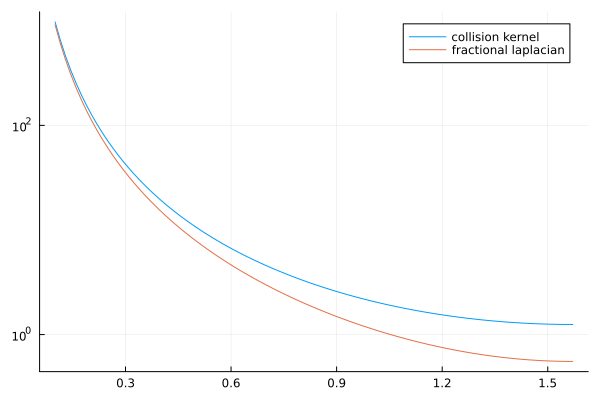

In [6]:
q = 1.51
cq = Cq(q,dimension=2)
println(cq)
θ = range(0.1,π/2,length=100)
b = 1/cq * map(α -> symb(α,q,dim=2),θ)
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot(θ,[b y], label=["collision kernel" "fractional laplacian"],yaxis=:log)

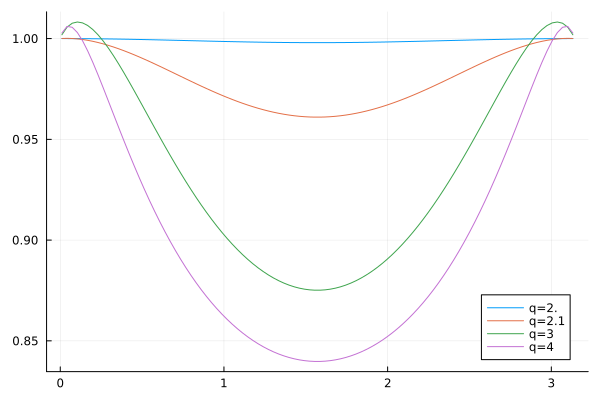

In [7]:
θ = range(0.01,π-0.01,length=100)
q = 2.
cq = Cq(q,dimension=2)
b = map(α -> symb(α,q,dim=2),θ) / cq
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot(θ, b./y , label="q=2.")

q = 2.1
cq = Cq(q,dimension=2)
b = map(α -> symb(α,q,dim=2),θ) / cq
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot!(θ,b ./ y, label="q=2.1")

q = 3
cq = Cq(q,dimension=2)
b = map(α -> symb(α,q,dim=2),θ) / cq
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot!(θ,b ./ y, label="q=3")

q = 4
cq = Cq(q,dimension=2)
b = map(α -> symb(α,q,dim=2),θ) / cq
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot!(θ,b ./ y, label="q=4")

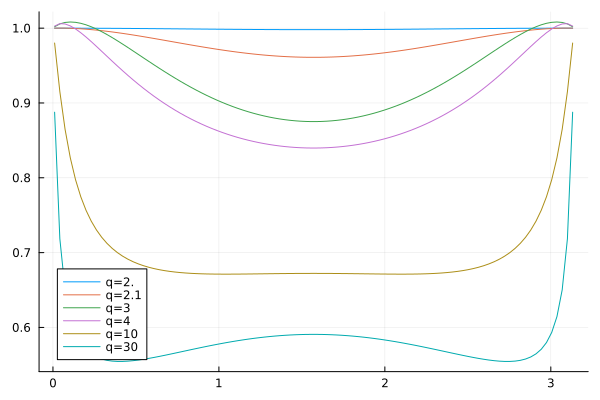

In [8]:
q = 11
cq = Cq(q,dimension=2)
b = map(α -> symb(α,q,dim=2),θ) / cq
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot!(θ,b ./ y, label="q=10")

q = 30
cq = Cq(q,dimension=2)
b = map(α -> symb(α,q,dim=2),θ) / cq
s = 0.5 / (q-1)
y = map(α -> fractional_laplacian(α,s), θ)
plot!(θ,b ./ y, label="q=30")

In [9]:
function draw_nice_pic(s::Real)
    @assert 0. <= s <= 1.
    println("s = ",s)
    q = qofν(2s,dimension=2)
    cq = Cq(q,dimension=2)
    θrange = range(π/(P+1)+0.001,π/2-0.001,length=100)
    brange = map(θ->symb(θ,q,dim=2),θrange)
    srange = cq * map(θ->fractional_laplacian(θ,s),θrange)
    plot(θrange,(srange),label="b_{fl}", yaxis=:log)
    p2 = plot!(θrange,(brange),label="b_{col}", yaxis=:log)
    display(p2)
    println("Graph for s=", s," in logarithmic scale")
end

draw_nice_pic (generic function with 1 method)

We will now draw some graphs to see how $b_{col}$ and $b_{fl}$ resemble each other or not. 

We renormalize $b_{fl}$ so that it has the same asymptotic behavior as $b_{col}$ at $\theta = 0$.

The blue line corresponds to the kernel $b_{fl}$ renormalized. The red line is the kernel $b_{col}$.

The graphs are in logarithmic scale.

s = 0.95


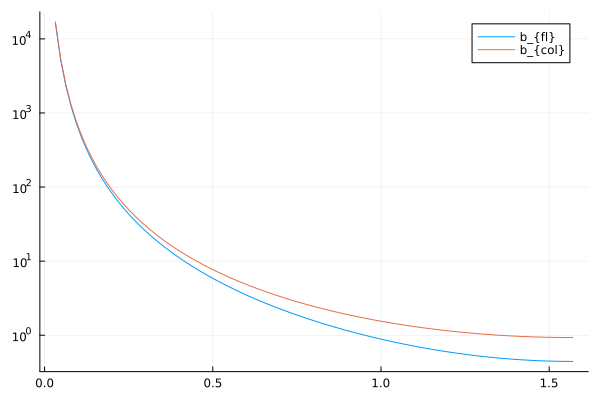

Graph for s=0.95 in logarithmic scale


In [10]:
draw_nice_pic(0.95)

s = 0.8


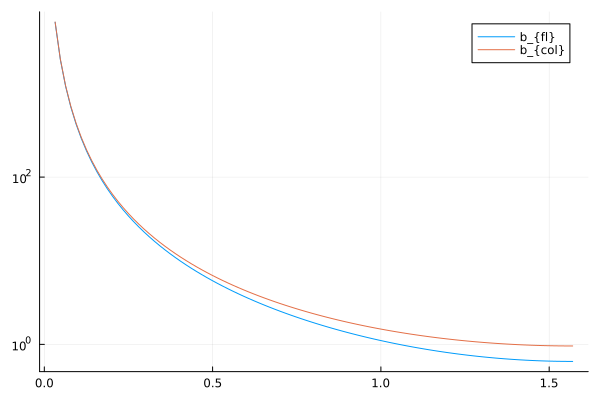

Graph for s=0.8 in logarithmic scale


In [11]:
draw_nice_pic(0.8)

s = 0.05


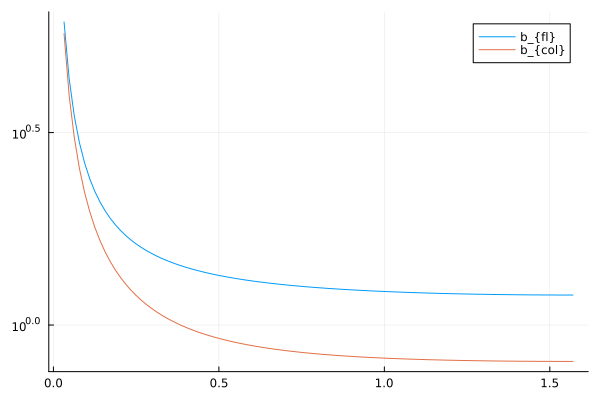

Graph for s=0.05 in logarithmic scale


In [12]:
draw_nice_pic(0.05)

In [ ]:
draw_nice_pic(0.025)